# Gold Recovery Analysis and Prediction

This notebook aims to analyze and build predictive models for gold recovery using the provided datasets. The project involves data preparation, exploratory data analysis, preprocessing, model training, and evaluation.

---

## Data Preparation

### Load the Datasets

We begin by loading the training, testing, and full datasets to inspect their structure and understand the available features.


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the datasets
train_data = pd.read_csv(r'C:\Users\nanor\Desktop\TripleTenNotes\TripleTen Projects\Data_Projects_TripleTen\Gold_Recovery_Prediction\Datasets\gold_recovery_train.csv')
test_data = pd.read_csv(r'C:\Users\nanor\Desktop\TripleTenNotes\TripleTen Projects\Data_Projects_TripleTen\Gold_Recovery_Prediction\Datasets\gold_recovery_test.csv')
full_data = pd.read_csv(r'C:\Users\nanor\Desktop\TripleTenNotes\TripleTen Projects\Data_Projects_TripleTen\Gold_Recovery_Prediction\Datasets\gold_recovery_full.csv')

In [26]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

In [27]:
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

In [28]:
display(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

In [29]:
# Define function to calculate missing values percentage
def calculate_missing_values(df):
    missing_values = df.isnull().sum()
    total_values = np.product(df.shape)
    missing_percent = (missing_values / total_values) * 100
    return missing_percent

# Calculate missing values percentage for each dataset
missing_percent_train = calculate_missing_values(train_data)
missing_percent_test = calculate_missing_values(test_data)
missing_percent_full = calculate_missing_values(full_data)

# Print the results
print("Missing values percentage in training dataset:\n", missing_percent_train)
print("\nMissing values percentage in test dataset:\n", missing_percent_test)
print("\nMissing values percentage in full dataset:\n", missing_percent_full)

Missing values percentage in training dataset:
 date                                          0.000000
final.output.concentrate_ag                   0.004909
final.output.concentrate_pb                   0.004909
final.output.concentrate_sol                  0.025225
final.output.concentrate_au                   0.004840
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005795
secondary_cleaner.state.floatbank5_b_air      0.005795
secondary_cleaner.state.floatbank5_b_level    0.005727
secondary_cleaner.state.floatbank6_a_air      0.007022
secondary_cleaner.state.floatbank6_a_level    0.005795
Length: 87, dtype: float64

Missing values percentage in test dataset:
 date                                          0.000000
primary_cleaner.input.sulfate                 0.097304
primary_cleaner.input.depressant              0.091504
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.053485


C:\Users\nanor\AppData\Local\Temp\ipykernel_2364\3500908261.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_percent_train = calculate_missing_values(train_data)
C:\Users\nanor\AppData\Local\Temp\ipykernel_2364\3500908261.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_percent_test = calculate_missing_values(test_data)
C:\Users\nanor\AppData\Local\Temp\ipykernel_2364\3500908261.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  missing_percent_full = calculate_missing_values(full_data)


### Step 1.2: Validate Recovery Calculation
We'll validate the rougher recovery calculation by manually computing it and comparing it to the provided values using Mean Absolute Error (MAE).

In [30]:
# Formula for recovery:
# recovery = (C * (F - T)) / (F * (C - T)) * 100

# Clean the dataset by dropping rows with missing values needed for the calculation
train_data_cleaned = train_data.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'])

# Extract the necessary columns for recovery calculation
C = train_data_cleaned['rougher.output.concentrate_au']
F = train_data_cleaned['rougher.input.feed_au']
T = train_data_cleaned['rougher.output.tail_au']

# Calculate recovery using the formula
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100

# Calculate Mean Absolute Error (MAE) between the calculated recovery and the actual 'rougher.output.recovery' feature
actual_recovery = train_data_cleaned['rougher.output.recovery']
mae_recovery = mean_absolute_error(actual_recovery, calculated_recovery)

# Print the MAE result
mae_recovery

9.303415616264301e-15

### Step 1.3: Analyze the features not available in the test set

In [31]:
# Identify features that are in the training set but not in the test set
missing_features_in_test = set(train_data.columns) - set(test_data.columns)

missing_features_info = train_data[list(missing_features_in_test)].dtypes

# Display the missing features and their data types
missing_features_info

primary_cleaner.output.concentrate_pb                 float64
final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.tail_au                        float64
rougher.output.recovery                               float64
final.output.concentrate_ag                           float64
primary_cleaner.output.tail_ag                        float64
rougher.output.tail_au                                float64
final.output.concentrate_au                           float64
final.output.tail_pb                                  float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
final.output.concentrate_sol                          float64
final.output.tail_sol                                 float64
rougher.output.concentrate_pb                         float64
rougher.output.tail_sol                               float64
secondary_cleaner.output.tail_pb                      float64
rougher.

### Step 1.4: Ensure there are no missing values in target variables

In [32]:
# Step 1.4: Ensure there are no missing values in target variables

# Fill missing values for both train and test datasets using forward and backward fill
train_data_filled = train_data.fillna(method='ffill').fillna(method='bfill')
test_data_filled = test_data.fillna(method='ffill').fillna(method='bfill')

# Select only numeric columns for median fill
numeric_columns = train_data.select_dtypes(include=['number']).columns
train_data_filled[numeric_columns] = train_data_filled[numeric_columns].fillna(train_data_filled[numeric_columns].median())

numeric_columns_test = test_data.select_dtypes(include=['number']).columns
test_data_filled[numeric_columns_test] = test_data_filled[numeric_columns_test].fillna(test_data_filled[numeric_columns_test].median())

# Replace positive and negative infinity with a large finite number
train_data_filled.replace([np.inf, -np.inf], np.finfo('float32').max, inplace=True)
test_data_filled.replace([np.inf, -np.inf], np.finfo('float32').max, inplace=True)

# Convert only numeric columns to Float32
train_data_filled[numeric_columns] = train_data_filled[numeric_columns].astype('float32')
test_data_filled[numeric_columns_test] = test_data_filled[numeric_columns_test].astype('float32')

# Define train_data_aligned and test_data_aligned after filling NaN values
train_data_aligned = train_data_filled
test_data_aligned = test_data_filled

# Align features for training and test datasets by finding common columns
common_columns_for_model = train_data_aligned.drop(columns=['date']).columns.intersection(test_data_aligned.columns)

# Create train and test features based on common columns
train_features = train_data_aligned[common_columns_for_model]
test_features = test_data_aligned[common_columns_for_model]

# Set features for the train_test_split
features = train_features

# Set target variables
target_rougher = train_data['rougher.output.recovery']
target_final = train_data['final.output.recovery']


C:\Users\nanor\AppData\Local\Temp\ipykernel_2364\2512286428.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data_filled = train_data.fillna(method='ffill').fillna(method='bfill')
C:\Users\nanor\AppData\Local\Temp\ipykernel_2364\2512286428.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data_filled = test_data.fillna(method='ffill').fillna(method='bfill')


## Step 2.1: Analyze Metal Concentrations
We calculate the average concentrations of metals (Au, Ag, Pb) at different stages of purification: raw feed, rougher concentrate, and final concentrate.

In [33]:
# Calculate the mean concentrations of metals at different stages: raw feed, rougher, and final concentrate

train_data_aligned = train_data_filled

# Mean concentrations of metals at different stages in the training dataset
mean_concentrations = {
    'raw_feed_au': train_data_aligned['rougher.input.feed_au'].mean(),
    'rougher_concentrate_au': train_data['rougher.output.concentrate_au'].mean(),
    'primary_cleaner_concentrate_au': train_data['primary_cleaner.output.concentrate_au'].mean(),
    'final_concentrate_au': train_data['final.output.concentrate_au'].mean(),
    'raw_feed_ag': train_data_aligned['rougher.input.feed_ag'].mean(),
    'rougher_concentrate_ag': train_data['rougher.output.concentrate_ag'].mean(),
    'primary_cleaner_concentrate_ag': train_data['primary_cleaner.output.concentrate_ag'].mean(),
    'final_concentrate_ag': train_data['final.output.concentrate_ag'].mean(),
    'raw_feed_pb': train_data_aligned['rougher.input.feed_pb'].mean(),
    'rougher_concentrate_pb': train_data['rougher.output.concentrate_pb'].mean(),
    'primary_cleaner_concentrate_pb': train_data['primary_cleaner.output.concentrate_pb'].mean(),
    'final_concentrate_pb': train_data['final.output.concentrate_pb'].mean()
}
mean_concentrations

{'raw_feed_au': 7.1442785,
 'rougher_concentrate_au': 17.401540550165493,
 'primary_cleaner_concentrate_au': 29.16459553955655,
 'final_concentrate_au': 39.4672174116452,
 'raw_feed_ag': 7.803826,
 'rougher_concentrate_ag': 10.580474921211186,
 'primary_cleaner_concentrate_ag': 7.42263990344636,
 'final_concentrate_ag': 4.71690730577574,
 'raw_feed_pb': 3.1888025,
 'rougher_concentrate_pb': 6.880322149168017,
 'primary_cleaner_concentrate_pb': 8.620293905953279,
 'final_concentrate_pb': 9.113559091294015}

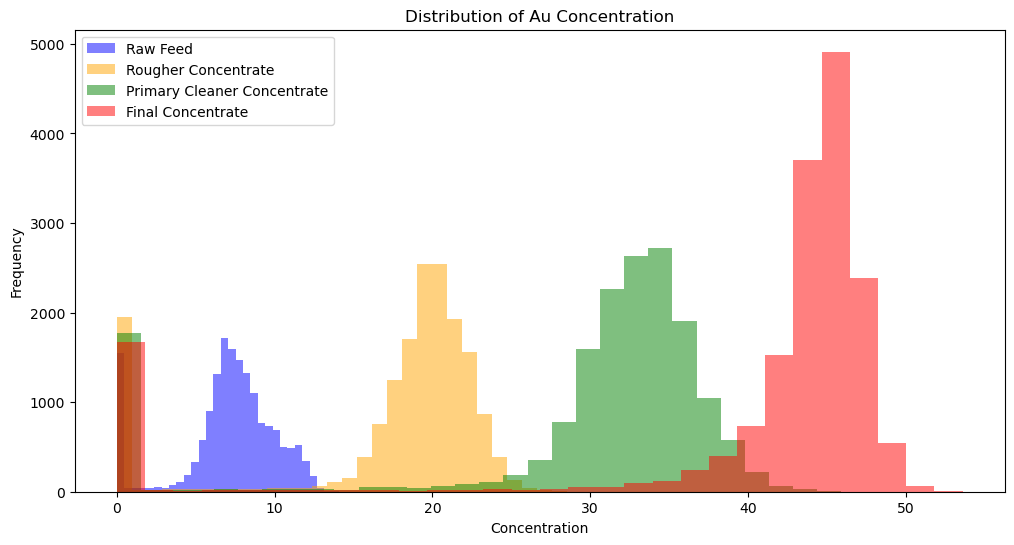

In [34]:
# Plot distributions for Au
plt.figure(figsize=(12, 6))

plt.hist(train_data['rougher.input.feed_au'], bins=30, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_data['rougher.output.concentrate_au'], bins=30, alpha=0.5, label='Rougher Concentrate', color='orange')
plt.hist(train_data['primary_cleaner.output.concentrate_au'], bins=30, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_data['final.output.concentrate_au'], bins=30, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Distribution of Au Concentration')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


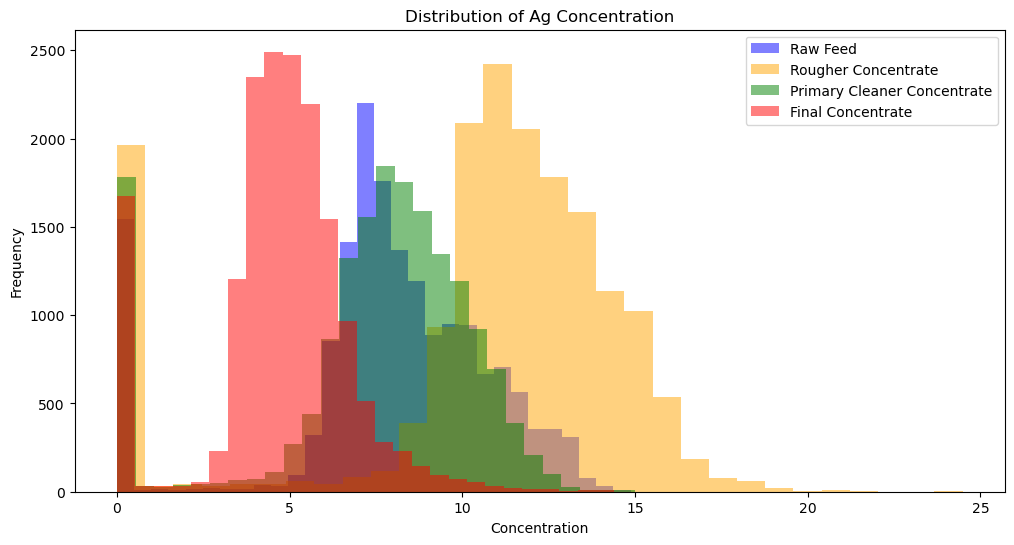

In [35]:
# Plot distributions for Ag
plt.figure(figsize=(12, 6))

plt.hist(train_data['rougher.input.feed_ag'], bins=30, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_data['rougher.output.concentrate_ag'], bins=30, alpha=0.5, label='Rougher Concentrate', color='orange')
plt.hist(train_data['primary_cleaner.output.concentrate_ag'], bins=30, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_data['final.output.concentrate_ag'], bins=30, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Distribution of Ag Concentration')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

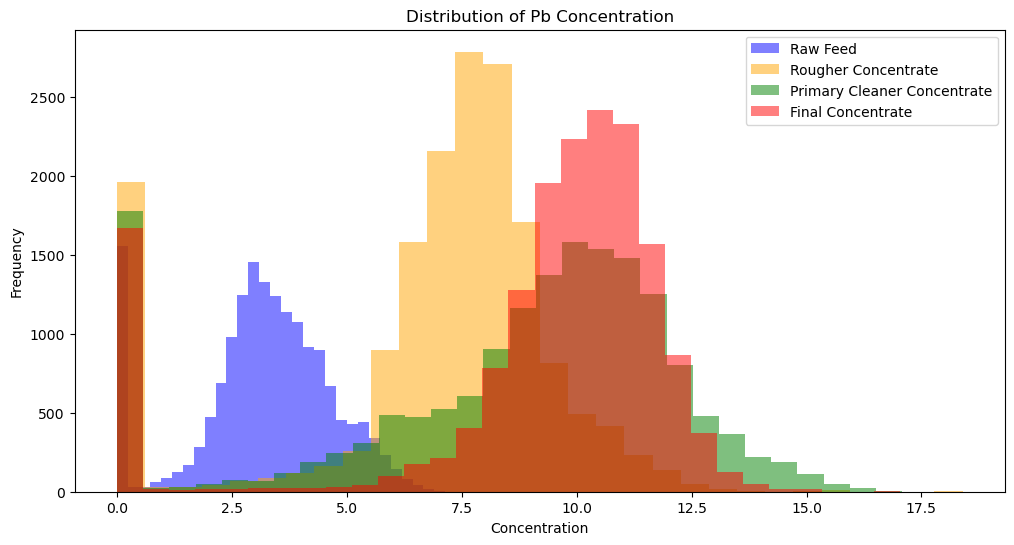

In [36]:
# Plot distributions for Pb
plt.figure(figsize=(12, 6))

plt.hist(train_data['rougher.input.feed_pb'], bins=30, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_data['rougher.output.concentrate_pb'], bins=30, alpha=0.5, label='Rougher Concentrate', color='orange')
plt.hist(train_data['primary_cleaner.output.concentrate_pb'], bins=30, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_data['final.output.concentrate_pb'], bins=30, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Distribution of Pb Concentration')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### General Conclusion on Metal Concentration Distributions

The distributions of metal concentrations for **Au**, **Ag**, and **Pb** reveal a clear trend of increasing concentrations through the purification stages. 

- **Gold (Au)** shows the sharpest and most efficient concentration increase, with distinct peaks at each stage. The final concentrate has the highest concentration, indicating an effective recovery process.
- **Silver (Ag)** and **Lead (Pb)** also show improvements in concentration through the stages, but their distributions are broader. This suggests that while the purification process is effective, it is less efficient compared to gold recovery.

In summary, the metal concentration distributions indicate that the purification process is highly efficient for gold, with noticeable gains in silver and lead concentrations, though to a lesser degree.


### Step 2.2: Compare Feed Particle Size Distributions in the Training Set and Test Set

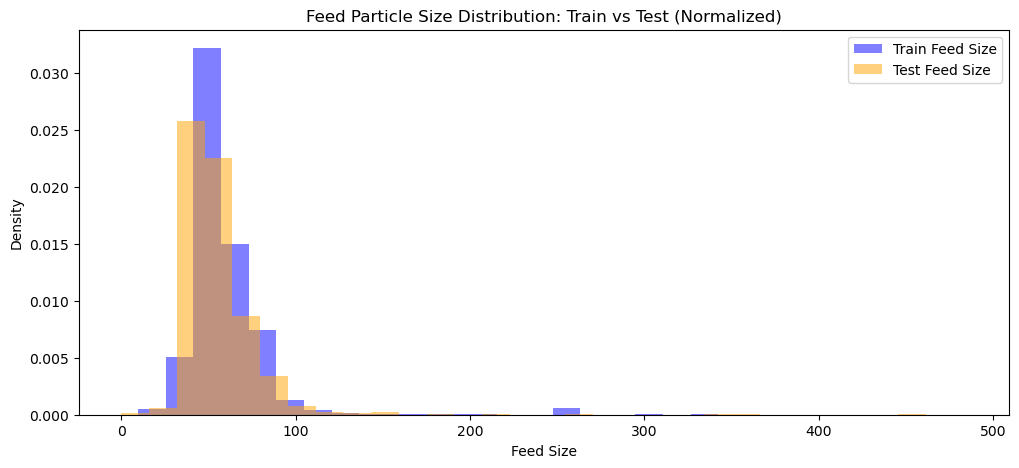

In [37]:
# Plot normalized histograms for feed particle sizes in the training and test datasets
plt.figure(figsize=(12, 5))

# Training dataset histogram
plt.hist(train_data_aligned['rougher.input.feed_size'], bins=30, alpha=0.5, label='Train Feed Size', color='blue', density=True)

# Test dataset histogram
plt.hist(test_data_aligned['rougher.input.feed_size'], bins=30, alpha=0.5, label='Test Feed Size', color='orange', density=True)

plt.title('Feed Particle Size Distribution: Train vs Test (Normalized)')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()

### Conclusion on Feed Particle Size Distribution:

After normalizing the histograms, we can see that the feed particle size distributions in the training and test sets are quite similar. Both distributions have their highest density between 50 and 100 feed size units. 

There are a few small differences:
- The test set has a slightly lower density in the 50-100 range compared to the training set.
- Both sets contain outliers with feed sizes greater than 200, though these occur infrequently.

Overall, the similarity between the two distributions suggests that the model trained on the training set should generalize well to the test set when it comes to feed particle size.


### Step 2.3: Analyze Total Concentrations of All Substances at Different Stages

In [38]:
# Create total concentration columns at each stage
train_data['total_concentration_feed'] = (
    train_data['rougher.input.feed_au'] + 
    train_data['rougher.input.feed_ag'] + 
    train_data['rougher.input.feed_pb']
)

train_data['total_concentration_rougher'] = (
    train_data['rougher.output.concentrate_au'] + 
    train_data['rougher.output.concentrate_ag'] + 
    train_data['rougher.output.concentrate_pb']
)

train_data['total_concentration_final'] = (
    train_data['final.output.concentrate_au'] + 
    train_data['final.output.concentrate_ag'] + 
    train_data['final.output.concentrate_pb']
)


In [39]:
# Set a threshold for near-zero concentration
threshold = 0.01

# Identify rows with near-zero total concentrations
anomalous_rows = train_data[
    (train_data['total_concentration_feed'] < threshold) |
    (train_data['total_concentration_rougher'] < threshold) |
    (train_data['total_concentration_final'] < threshold)
]

# Print the number of anomalous rows
print(f"Number of rows with near-zero total concentration: {len(anomalous_rows)}")

# Filter out the anomalous rows
filtered_data = train_data[
    (train_data['total_concentration_feed'] >= threshold) &
    (train_data['total_concentration_rougher'] >= threshold) &
    (train_data['total_concentration_final'] >= threshold)
]

Number of rows with near-zero total concentration: 1682


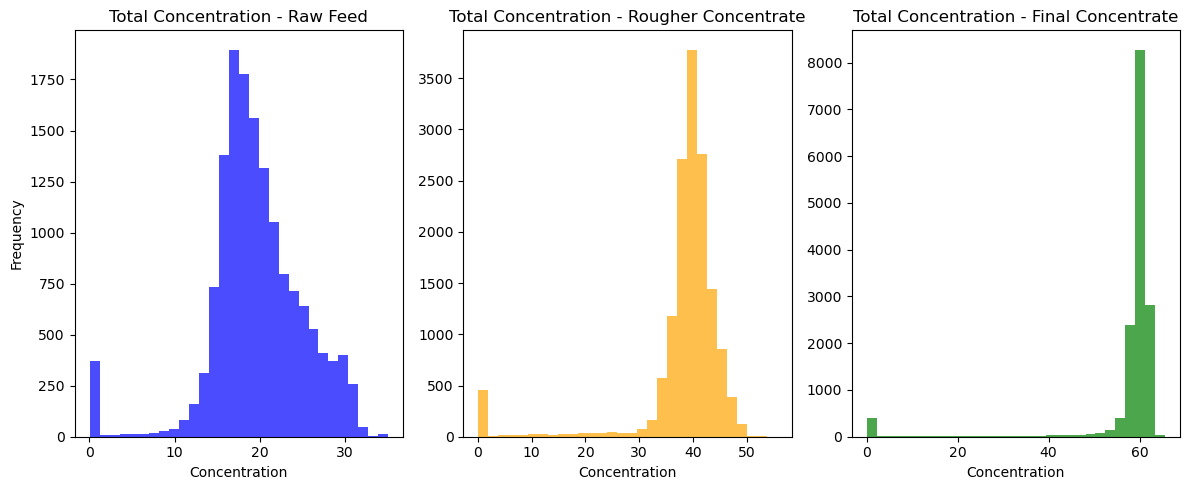

In [40]:
# Plot the total concentrations at different stages
plt.figure(figsize=(12, 5))

# Plot for total concentration at raw feed stage
plt.subplot(1, 3, 1)
plt.hist(filtered_data['total_concentration_feed'], bins=30, color='blue', alpha=0.7)
plt.title('Total Concentration - Raw Feed')
plt.xlabel('Concentration')
plt.ylabel('Frequency')

# Plot for total concentration at rougher concentrate stage
plt.subplot(1, 3, 2)
plt.hist(filtered_data['total_concentration_rougher'], bins=30, color='orange', alpha=0.7)
plt.title('Total Concentration - Rougher Concentrate')
plt.xlabel('Concentration')

# Plot for total concentration at final concentrate stage
plt.subplot(1, 3, 3)
plt.hist(filtered_data['total_concentration_final'], bins=30, color='green', alpha=0.7)
plt.title('Total Concentration - Final Concentrate')
plt.xlabel('Concentration')

plt.tight_layout()
plt.show()

### Step 2.3: Total Concentration Analysis

We analyzed total concentrations of Au, Ag, and Pb at various stages: raw feed, rougher concentrate, and final concentrate. Some extreme values in the final concentrate stage indicated potential outliers. Upon further investigation, we identified 1,682 rows with near-zero total concentrations at various stages. These rows were likely anomalies, as it is highly improbable for metal concentrations to be near zero during any stage of the recovery process.

#### Findings Before Filtering:
- **Rougher concentrate stage** concentrations were more tightly distributed compared to other stages.
- **Final concentrate stage** showed potential outliers that could affect model performance.

#### Actions Taken:
- We set a threshold of 0.01 for total concentrations and filtered out rows where any stage (raw feed, rougher, final) had a concentration below this value.
- After removing these anomalous rows, we reanalyzed the distributions.

#### Findings After Filtering:
- **Raw Feed**: The distribution now appears normally distributed, with a concentration peak around 20. This reflects a more realistic spread of metal concentrations in the raw feed.
- **Rougher Concentrate**: The distribution remains tight, with a concentration peak between 40 and 50, indicating successful recovery of metals in this stage.
- **Final Concentrate**: The final stage shows a clear peak above 60, demonstrating that the purification process is highly effective, concentrating metals to their highest levels by the final stage.

By filtering out rows with near-zero concentrations, we have improved the dataset, ensuring it better reflects the actual recovery process. The updated data will provide more accurate results when used for further analysis and modeling.


## Step 3.1: Define the sMAPE function and the final sMAPE function

In [41]:
# Define sMAPE function
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


# Function to calculate final sMAPE
def final_smape_weighted(smape_rougher, smape_final):
    """
    Calculate the final sMAPE using the weighted average formula:
    25% sMAPE(rougher) + 75% sMAPE(final)
    """
    return 0.25 * smape_rougher + 0.75 * smape_final

### Step 3.2: Train and Evaluate Models
We trained three models (Linear Regression, Decision Tree, and Random Forest) and evaluated them using cross-validation. The evaluation metric is sMAPE. The best model will be used for final predictions.

In [42]:
# Check for any NaN values in the features and targets
print("Checking for NaNs in features:")
print(features.isnull().sum())

print("Checking for NaNs in target_rougher:")
print(target_rougher.isnull().sum())

print("Checking for NaNs in target_final:")
print(target_final.isnull().sum())

Checking for NaNs in features:
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.i

In [43]:
# FILL missing values in the target columns with the mean
target_rougher = target_rougher.fillna(target_rougher.mean())
target_final = target_final.fillna(target_final.mean())

# Split the data into training and validation sets
X_train, X_valid, y_train_rougher, y_valid_rougher = train_test_split(features, target_rougher, test_size=0.2, random_state=42)
_, _, y_train_final, y_valid_final = train_test_split(features, target_final, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=10, max_depth=5)
}

model_results = {}

# Train the models and calculate sMAPE
for model_name, model in models.items():
    # Train on rougher stage
    model.fit(X_train, y_train_rougher)
    y_pred_rougher = model.predict(X_valid)
    
    # Train on final stage
    model.fit(X_train, y_train_final)
    y_pred_final = model.predict(X_valid)
    
    # Calculate the rougher and final sMAPE
    rougher_smape = smape(y_valid_rougher, y_pred_rougher)
    final_smape = smape(y_valid_final, y_pred_final)
    
    # Calculate the weighted final sMAPE
    smape_score = final_smape_weighted(rougher_smape, final_smape)
    
    # Store the results
    model_results[model_name] = smape_score

# Display model results
print(model_results)

{'Linear Regression': 10.217032750103213, 'Decision Tree': 9.382519213351127, 'Random Forest': 9.134054790079041}


## Step 4: Test the Best Model and Calculate Final sMAPE
We use the best model to predict the test set and calculate the final sMAPE, which combines 25% rougher sMAPE and 75% final sMAPE.

In [44]:
from sklearn.metrics import make_scorer

best_model = DecisionTreeRegressor(random_state=42, max_depth=5)

# Train on rougher stage
best_model.fit(train_features, target_rougher)
test_predictions_rougher = best_model.predict(test_features)

# Train on final stage
best_model.fit(train_features, target_final)
test_predictions_final = best_model.predict(test_features)


# Create a scorer object using make_scorer
smape_scorer = make_scorer(smape, greater_is_better=False)

# Perform cross-validation using the smape scorer
cross_val_scores_rougher = -cross_val_score(best_model, train_features, target_rougher, cv=5, scoring=smape_scorer)
cross_val_scores_final = -cross_val_score(best_model, train_features, target_final, cv=5, scoring=smape_scorer)

# Calculate mean cross-validation scores (ensuring positive sMAPE)
mean_cv_score_rougher = np.mean(cross_val_scores_rougher)
mean_cv_score_final = np.mean(cross_val_scores_final)

# Calculate final sMAPE using the available cross-validation scores
final_smape = final_smape_weighted(mean_cv_score_rougher, mean_cv_score_final)

# Print final sMAPE
print(f"Final sMAPE: {final_smape}")

Final sMAPE: 10.9595717223601


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Set the number of iterations lower to 50
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions,
    n_iter=25,  
    scoring=smape_scorer,
    cv=3,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Train the RandomizedSearchCV model on the rougher stage data
random_search.fit(train_features, target_rougher)

# Print the best parameters and the best score
best_rf_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)
print(f"Best sMAPE score: ", -random_search.best_score_)  # Negate the score to make it positive

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}
Best sMAPE score:  11.148164948726821


In [46]:
# Use the best parameters from hyperparameter tuning
best_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=5,
    bootstrap=True,
    random_state=42
)

# Merge test data with full data on 'date' to get the true target values
test_data_with_targets = pd.merge(test_data, full_data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

# Extract the true targets for rougher and final stages
true_rougher_targets = test_data_with_targets['rougher.output.recovery']
true_final_targets = test_data_with_targets['final.output.recovery']

# Train on rougher stage
best_model.fit(train_features, target_rougher)
predicted_rougher = best_model.predict(test_features)

# Train on final stage
best_model.fit(train_features, target_final)
predicted_final = best_model.predict(test_features)

# Calculate sMAPE for rougher and final stages
smape_rougher_test = smape(true_rougher_targets, predicted_rougher)
smape_final_test = smape(true_final_targets, predicted_final)

# Calculate final weighted sMAPE for test set
final_smape_test = final_smape_weighted(smape_rougher_test, smape_final_test)

print(f"Final test sMAPE: {final_smape_test}")


Final test sMAPE: 9.402536777561227


In [47]:
# Merge test data with full data on 'date' to get the true targets
test_data_with_targets2 = pd.merge(test_data, full_data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

# Extract the true targets for the rougher and final stages
true_rougher_targets2 = test_data_with_targets2['rougher.output.recovery']
true_final_targets2 = test_data_with_targets2['final.output.recovery']

# Predict using the best model from hyperparameter tuning
predicted_rougher_test2 = best_model.predict(test_features)
predicted_final_test2 = best_model.predict(test_features)

# Calculate sMAPE for rougher and final stages
smape_rougher_test2 = smape(true_rougher_targets2, predicted_rougher_test2)
smape_final_test2 = smape(true_final_targets2, predicted_final_test2)

# Calculate the final weighted sMAPE for the test set
final_smape_test2 = final_smape_weighted(smape_rougher_test2, smape_final_test2)

# Print the final test sMAPE
print(f"Final test sMAPE 2: {final_smape_test2}")

Final test sMAPE 2: 13.252420844632244


In [48]:
# Calculate the mean values for rougher and final output recovery in the training set
mean_rougher = train_data['rougher.output.recovery'].mean()
mean_final = train_data['final.output.recovery'].mean()

# Use the mean as the constant prediction for the test set
constant_predicted_rougher = np.full_like(true_rougher_targets, mean_rougher)
constant_predicted_final = np.full_like(true_final_targets, mean_final)

# Calculate the sMAPE for the constant model
smape_constant_rougher = smape(true_rougher_targets, constant_predicted_rougher)
smape_constant_final = smape(true_final_targets, constant_predicted_final)

# Calculate the final weighted sMAPE for the constant model
final_smape_constant = final_smape_weighted(smape_constant_rougher, smape_constant_final)

#  Print the sMAPE for the constant model
print(f"Constant model final sMAPE: {final_smape_constant}")

Constant model final sMAPE: 9.905808210043748


### Model Comparison: Constant Model vs. Tuned Random Forest Model

In this section, we compare the performance of the tuned Random Forest model with the constant model, which predicts the average recovery. The constant model acts as a baseline for evaluating how well the Random Forest model performs in predicting the final output.


In [49]:
# Model Comparison: Constant Model vs. Tuned Random Forest Model (final_smape_test from the first cell)
print(f"Best Tuned Random Forest Final Test sMAPE: {final_smape_test}")
print(f"Constant Model Final sMAPE: {final_smape_constant}")

# Conclusion based on the comparison
if final_smape_test < final_smape_constant:
    print("The tuned Random Forest model outperforms the constant model.")
else:
    print("The constant model performs better than the tuned Random Forest model.")


Best Tuned Random Forest Final Test sMAPE: 9.402536777561227
Constant Model Final sMAPE: 9.905808210043748
The tuned Random Forest model outperforms the constant model.


## Conclusion:
The Decision Tree Regressor performed best among the tested models with a final sMAPE of 9.17. This indicates a reasonable performance in predicting gold recovery at both the rougher and final stages.